In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.odr import * 


In [2]:
data = pd.read_csv('m45.txt',comment = '#', skiprows = 51, header = None, usecols = [1,2], delim_whitespace = True)
data.head()

,1,2
0,9.47,0.48
1,11.99,0.93
2,12.62,1.08
3,10.51,0.71
4,10.79,0.70


In [3]:
x = data[2]
y = data[1]

Text(0, 0.5, 'V')

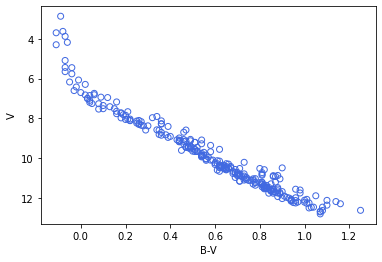

In [4]:
plt.gca().invert_yaxis()
plt.scatter(x,y, color = 'none', edgecolor = 'royalblue')
plt.xlabel('B-V')
plt.ylabel('V')

In [5]:
def linear_func(p, x):
    m, c = p
    return m*x + c

# Model object
modelo = Model(linear_func)

# test data and error

# Create a Data object
data1 = Data(x, y)

initialguess = [0,0]
odr = ODR(data1, modelo, beta0=initialguess)


# Run the regression.
odr.set_job(fit_type=2) #0 = implicit ODR, 1 = explicit ODR, 2 = ordinary least squares
out = odr.run()

#print fit parameters
popt = out.beta
perr = out.sd_beta
popt,perr

(array([5.97670326, 6.38377482]), array([0.0902724 , 0.05952226]))

In [20]:
from scipy.stats import linregress

linregress(x,y)

LinregressResult(slope=5.97670326177359, intercept=6.383774818799205, rvalue=0.9707642468224845, pvalue=4.1097586712013586e-168, stderr=0.09027240332172741, intercept_stderr=0.05952226168952508)

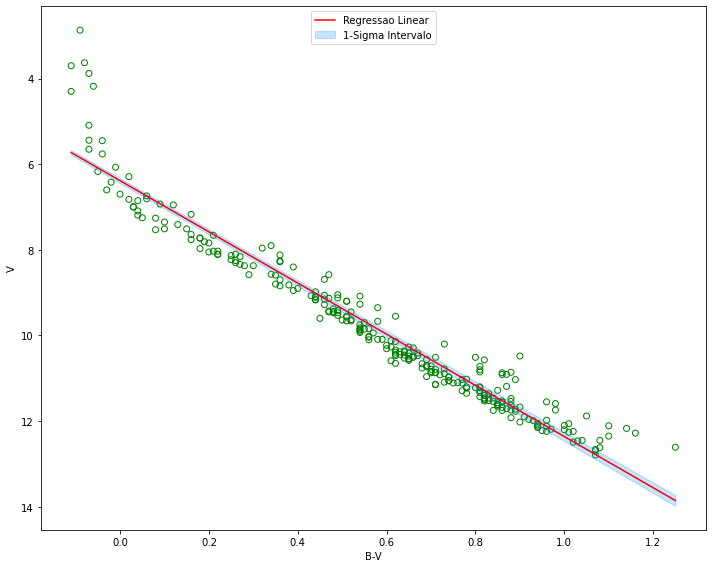

In [7]:
t_fit = np.linspace(x.min(), x.max(), len(x))
fit = linear_func(popt, t_fit) 
sigmay = np.sqrt((t_fit*perr[0])**2 + (perr[1])**2)



fig, ax = plt.subplots(figsize=(10,8))
fig.gca().invert_yaxis()

ax.plot(t_fit, fit, 'r', label='Regressao Linear') #Regressao Linear para um wide maior de pontos
#ax.plot(x,popt[0]*x + popt[1], 'r', color = 'red', label='Regressao Linear')
ax.scatter(x,y, color = 'none', edgecolor = 'green')
ax.fill_between(t_fit, fit + sigmay, fit - sigmay, alpha=.25, label='1-Sigma Intervalo', color = 'dodgerblue')
ax.legend(framealpha=0.8, loc = 'upper center')
ax.set_xlabel('B-V')
ax.set_ylabel('V')
fig.tight_layout()

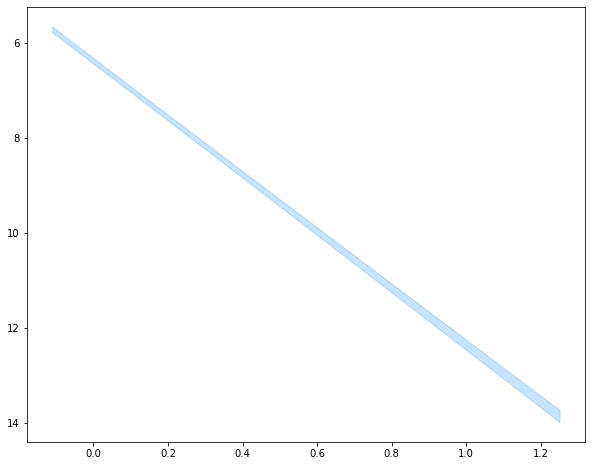

In [8]:
plt.figure(figsize=(10,8))
plt.gca().invert_yaxis()
plt.fill_between(t_fit, fit + sigmay, fit - sigmay, alpha=.25, label='1-Sigma Intervalo', color = 'dodgerblue')

In [8]:
xadj = []
yadj = []

count = 0


ytentativa = popt[0]*x + popt[1]

for element in y:
    if ytentativa[count] + 1*sigmay[count] >= element and ytentativa[count] - 1*sigmay[count] <= element:
        xadj.append(x[count])
        yadj.append(y[count])
    count+=1
xadj = np.asarray(xadj)
yadj = np.asarray(yadj)


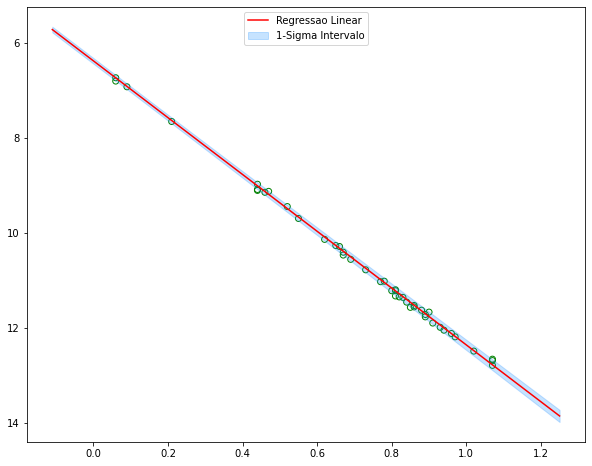

In [10]:
plt.figure(figsize=(10,8))
plt.gca().invert_yaxis()
plt.plot(t_fit, fit, color = 'red', label='Regressao Linear')
plt.scatter(xadj,yadj, color = 'none', edgecolor = 'green')
plt.fill_between(t_fit, fit + 1*sigmay, fit - 1*sigmay, alpha=.25, label='1-Sigma Intervalo', color = 'dodgerblue')
plt.legend(framealpha=0.8, loc = 'upper center')

In [11]:
estrelas_antes = len(x)
estrelas_depois = len(xadj)

print('Havia',estrelas_antes, 'estrelas antes do sigma-clipping.' )
print(estrelas_antes - estrelas_depois, 'estrelas foram retiradas.')
print('Apenas', estrelas_depois, 'remanesceram no intervalo 1-sigma.')
print(len(xadj)/len(x))

Havia 270 estrelas antes do sigma-clipping.
227 estrelas foram retiradas.
Apenas 43 remanesceram no intervalo 1-sigma.
0.15925925925925927


In [12]:
xout = []
yout = []
for a,b in zip(x,y):
    if a not in xadj and b not in yadj:
        xout.append(a)
        yout.append(b)
xout =np.asarray(xout)
yout = np.asarray(yout)

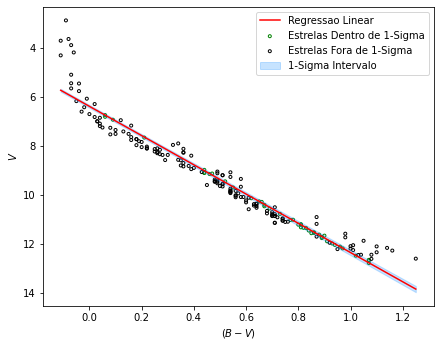

In [14]:
plt.figure(figsize=(7,5.5)) 
plt.gca().invert_yaxis()
plt.plot(t_fit, fit, 'r', label='Regressao Linear')
plt.scatter(xadj,yadj, marker='.', color = 'none', edgecolor = 'green', label = 'Estrelas Dentro de 1-Sigma')
plt.scatter(xout,yout, marker = ".",color = 'none', edgecolor = 'black', label = 'Estrelas Fora de 1-Sigma')
plt.fill_between(t_fit, fit + sigmay, fit - sigmay, alpha=.25, label='1-Sigma Intervalo', color = 'dodgerblue')
plt.legend(framealpha=0.8, loc = 'best')
plt.xlabel(r"$(B-V)$")
plt.ylabel(r"$V$");

In [15]:
#Main Sequence

mainsequence = Data(xadj, yadj)

initialguess = [0,0]
odr = ODR(mainsequence, modelo, beta0=initialguess)


# Run the regression.
odr.set_job(fit_type=2) #0 = implicit ODR, 1 = explicit ODR, 2 = ordinary least squares
out = odr.run()

#print fit parameters and 1-sigma estimates
popt_mainsequence = out.beta
perr_mainsequence = out.sd_beta

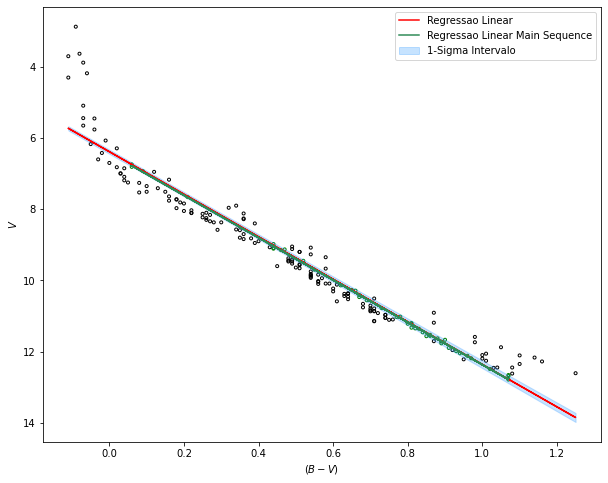

In [17]:
plt.figure(figsize=(10,8))
plt.gca().invert_yaxis()
plt.plot(x, popt[0]*x + popt[1], 'r',  label='Regressao Linear')
plt.scatter(xadj,yadj, marker='.', color = 'none', edgecolor = 'green')
plt.scatter(xout,yout, marker = ".",color = 'none', edgecolor = 'black')
#plt.plot(xadj, xadj*result.slope + result.intercept, color = 'seagreen')
plt.plot(xadj, xadj*popt_mainsequence[0] + popt_mainsequence[1], color = 'seagreen', label='Regressao Linear Main Sequence')
plt.fill_between(t_fit, fit + sigmay, fit - sigmay, alpha=.25, label='1-Sigma Intervalo', color = 'dodgerblue')
plt.legend(framealpha=0.8, loc = 'best')
plt.xlabel(r"$(B-V)$")
plt.ylabel(r"$V$");
#plt.savefig('test.png', format = 'png')

In [16]:
f = open("RegressaoM45.txt", "w")
f.write("Slope, Intercept, Slope_Error, Intercept_Error,TurnOffColor \n")
f.write( str(popt_mainsequence[0]) + ', ' + str(popt_mainsequence[1]) + ', ' + str(perr_mainsequence[0]) + ', ' + str(perr_mainsequence[1]) + ', ' + str(x.min()) + '\n')
f.close()

In [18]:
x.min() ###Pegando na regressao o minimo de X! Antes, pegava-se de Xadj!

-0.11

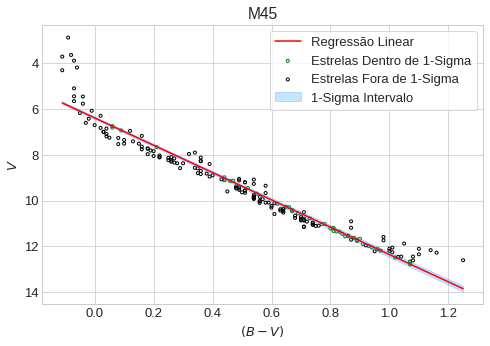